# 1. Install and Import Baseline Dependecies

In [10]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install bs4


SyntaxError: invalid syntax (3307789763.py, line 1)

In [14]:
pip install torch


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install ipywidgets

     -------------------------------------- 134.4/134.4 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 384.1/384.1 kB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 16.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from bs4 import BeautifulSoup
import requests
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

# 2. Setup Summarization Model

In [5]:
pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
model_name = "human-centered-summarization/financial-summarization-pegasus"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

Downloading: 100%|████████████████████████████████████████████████████████████████| 2.28G/2.28G [00:48<00:00, 47.3MB/s]


# 3. Summarize a Single Article

In [12]:
article_link = 'https://finance.yahoo.com/news/collapsed-ftx-owes-nearly-3-090734717.html'

In [13]:
r = requests.get(article_link)

In [14]:
soup = BeautifulSoup(r.text, 'html.parser')

In [15]:
paragraphs =soup.find_all('p')

In [16]:
paragraphs

[<p>(Reuters) - Cryptocurrency exchange FTX, which has filed for U.S. bankruptcy court protection, said it owes its 50 biggest creditors nearly $3.1 billion.</p>,
 <p>The exchange owes about $1.45 billion to its top ten creditors, it said in a court filing on Saturday, without naming them.</p>,
 <p>FTX and its affiliates filed for bankruptcy in Delaware on Nov. 11 in one of the highest-profile crypto blowups, leaving an estimated 1 million customers and other investors facing total losses in the billions of dollars.</p>,
 <p>The crypto exchange said on Saturday it has launched a strategic review of its global assets and is preparing for the sale or reorganization of some businesses.</p>,
 <p>(Reporting by Juby Babu in Bengaluru; Editing by Angus MacSwan)</p>]

In [17]:
text = [paragraph.text for paragraph in paragraphs]

In [19]:
text

['(Reuters) - Cryptocurrency exchange FTX, which has filed for U.S. bankruptcy court protection, said it owes its 50 biggest creditors nearly $3.1 billion.',
 'The exchange owes about $1.45 billion to its top ten creditors, it said in a court filing on Saturday, without naming them.',
 'FTX and its affiliates filed for bankruptcy in Delaware on Nov. 11 in one of the highest-profile crypto blowups, leaving an estimated 1 million customers and other investors facing total losses in the billions of dollars.',
 'The crypto exchange said on Saturday it has launched a strategic review of its global assets and is preparing for the sale or reorganization of some businesses.',
 '(Reporting by Juby Babu in Bengaluru; Editing by Angus MacSwan)']

In [24]:
words = ' '.join(text).split(' ')[:200]

In [26]:
Article  = ' '.join(words)

In [27]:
Article

'(Reuters) - Cryptocurrency exchange FTX, which has filed for U.S. bankruptcy court protection, said it owes its 50 biggest creditors nearly $3.1 billion. The exchange owes about $1.45 billion to its top ten creditors, it said in a court filing on Saturday, without naming them. FTX and its affiliates filed for bankruptcy in Delaware on Nov. 11 in one of the highest-profile crypto blowups, leaving an estimated 1 million customers and other investors facing total losses in the billions of dollars. The crypto exchange said on Saturday it has launched a strategic review of its global assets and is preparing for the sale or reorganization of some businesses. (Reporting by Juby Babu in Bengaluru; Editing by Angus MacSwan)'

In [29]:
input_ids = tokenizer.encode(Article, return_tensors='pt')

In [30]:
input_ids

tensor([[  143, 25445,   158,   233, 52399,  2264,  1091, 19227,   108,   162,
           148,  3252,   118,   475,   107,   283,   107,  7073,  1462,  1471,
           108,   243,   126, 26708,   203,  1149,  1715, 13433,  1517, 79924,
          1722,   107,   139,  2264, 26708,   160, 41205,  1343,  1722,   112,
           203,   349,  2069, 13433,   108,   126,   243,   115,   114,  1462,
          5809,   124,  1327,   108,   347, 14537,   183,   107,  1091, 19227,
           111,   203, 11834,  3252,   118,  7073,   115, 11005,   124,  4747,
           107,  1073,   115,   156,   113,   109,  1330,   121, 12651, 11625,
          6049,  5151,   108,  2096,   142,  3627,   305,   604,   527,   111,
           176,  2714,  2931,   916,  5054,   115,   109, 13353,   113,  2729,
           107,   139, 11625,  2264,   243,   124,  1327,   126,   148,  2365,
           114,  3112,   933,   113,   203,  1122,  2718,   111,   117,  3946,
           118,   109,   925,   132, 38771,   113,  

In [32]:
output = model.generate(input_ids, max_length=55, num_beams = 5, early_stopping=True)

In [33]:
summary = tokenizer.decode(output[0] , skip_special_tokens=True)

In [34]:
summary

'FTX says it owes about $1.45 billion to its top ten creditors. Exchange filed for bankruptcy on Nov. 11 in one of the highest-profile blowups'

# 3. Building a News and Sentiment Pipeline

In [36]:
monitored = ['TSL', 'ETH', 'BTC', 'META' , 'AAPL']

## 3.1 Search for stock news using  Yahoo Finance

In [61]:
def search_news_urls(ticker):
    url = f"https://news.search.yahoo.com/search;_ylt=AwrFD22hPHpjY78wWg9XNyoA;_ylu=Y29sbwNiZjEEcG9zAzEEdnRpZAMEc2VjA3BpdnM-?p={ticker}&fr2=piv-web&fr=news"
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    atags = soup.find_all('a', attrs={'class':'thmb'})
    links = [link['href'] for link in atags]
    return links
             

In [62]:
search_news_urls('BTC')

['https://cointelegraph.com/news/gbtc-bitcoin-discount-nears-50-on-ftx-woes-as-investors-stock-up',
 'https://www.fool.com/investing/2022/11/20/biggest-crypto-investors-are-dollar-cost-averaging/',
 'https://www.forbes.com/sites/billybambrough/2022/11/20/in-huge-trouble-10-billion-earthquake-could-be-about-to-cause-bitcoin-and-ethereum-price-chaos/',
 'https://www.fool.com/investing/2022/11/15/should-you-buy-bitcoin-while-its-still-below-20000/',
 'https://seekingalpha.com/article/4558726-bitcoin-could-drop-below-10k-crypto-winter',
 'https://ca.investing.com/news/cryptocurrency-news/btc-still-has-bearish-momentum-to-overcome-price-levels-to-watch-2835359',
 'https://ca.investing.com/news/cryptocurrency-news/btcs-current-position-in-its-market-cycle-is-a-decisive-point-2835767',
 'https://ca.investing.com/news/cryptocurrency-news/can-the-bulls-push-btc-price-to-17000-in-a-lethargic-backdrop-2835875',
 'https://cointelegraph.com/news/bitcoin-sees-record-stock-to-flow-miss-btc-price-mode

# 4. Search and Scrape Urls's 

In [69]:
def scrape_and_process(ticker):
    ARTICLES = []
    urls = search_news_urls(ticker)
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.text,'html.parser')
        paragraphs = soup.find_all('p')
        text = [paragraph.text for paragraph in paragraphs]
        try:
            words = ' '.join(text).split(' ')[:400]
        except:
            pass
        else:
            words = ' '.join(text).split(' ')[:200]
        article = ' '.join(words)
        if  not article.startswith('This website is using a security service') and not article.startswith('Thank you for your patience') and len(article) > 0:
            ARTICLES.append(article)
    return ARTICLES
    
    

In [70]:
scrape_and_process('BTC')

["Bitcoin\nBTC\n and cryptocurrencies have been left reeling by the sudden collapse of major crypto exchange FTX this month (though Elon Musk has issued a surprise 2023 crypto prediction). Subscribe now to Forbes' CryptoAsset & Blockchain Advisor and successfully navigate the latest bitcoin and crypto market crash The bitcoin price has plummeted under $17,000 per bitcoin, down from almost $70,000 12 months ago, while ethereum has collapsed toward $1,000 per ether with JPMorgan warning the price crash could be just getting started. Now, fears are swirling that $10 billion bitcoin and crypto giant Digital Currency Group (DCG) could be in trouble after its crypto lender Genesis was forced to pause withdrawals and reports emerged it's seeking an emergency $1 billion loan. It's in a brutal bear market that you need up-to-date information the most! Sign up now for the free CryptoCodex—A daily newsletter for traders, investors and the crypto-curious that will keep you ahead of the market The 

In [71]:
all_tickers ={
    ticker:scrape_and_process(ticker) for ticker in monitored}

In [72]:
all_tickers

{'TSL': ['Lockdowns have devastated Europe\'s ski season. And left skiers and snowboarders looking for something to do. Now that\'s creating a surprise winner amidst the business turmoil. Demand for snow shoes has rocketed. Using them doesn\'t require a ski lift. And hiking into the wilderness is natural social distancing. Philippe Gallay is the boss of TSL, the world\'s biggest maker of snow shoes. He says orders are off the chart: "For us, it is quite stressful, but it\'s a good stress, because we are crumbling under orders, we don\'t know how we will make it - it\'s rather a good stress." Last month TSL\'s factory in Annecy took orders for 100,000 pairs. That\'s three times what it would normally do in a whole year. Gallay has quadrupled his usual workforce, and has the factory running 24/7. But he still has a backlog of 40,000 orders. Over at the ski school, director Gregoire Chavanel has noticed the change: "We rent equipment at the ski resort, and we have around 100 snowshoes, wh

# 5. Summarize All Articles

In [73]:
def sumarize(articles):
    summaries = []
    for article in articles:
        input_ids = tokenizer.encode(article, return_tensors='pt')
        output = model.generate(input_ids, max_length=55, num_beams=5, early_stopping=True)
        summary = tokenizer.decode(output[0], skip_special_tokens=True)
        summaries.append(summary)
    return summaries

In [75]:
summaries = {ticker:sumarize(all_tickers[ticker]) for ticker in monitored}

In [77]:
summaries


{'TSL': ["Lockdowns have devastated Europe's ski season, but snowshoes are a hit."],
 'ETH': ['Ethereum price has had a very binary path in its history.',
  'Largest cryptocurrency by market cap is close to psychological support level. Chain swap moves USDT from Solana to Ethereum',
  'The floor price for a Bored Ape Yacht Club is about $69,800. The price to join the exclusive club has fallen since the start of the month',
  'Genesis pulls back on payouts, repayments of funds. Gemini has cut withdrawals from its lending program'],
 'BTC': ['Digital Currency Group is seeking a $1 billion loan, reports say.',
  'El Salvador to buy one Bitcoin per day, starting Nov. 17.',
  'Bitcoin briefly hits lowest price in nearly two years after FTX crash.',
  'FTX bankruptcy is not the first time Bitcoin has had problems.',
  'KoFIU launches probe into crypto exchanges in relation to native tokens.'],
 'META': ['Meta Quest 2 Special Edition brings back $100 price hike.',
  'Meta AI developed Galacti

# 6. Adding Sentiment Analysis

In [78]:
from transformers import pipeline

In [79]:
sentiment = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Downloading: 100%|█████████████████████████████████████████████████████████████████████| 629/629 [00:00<00:00, 315kB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████| 268M/268M [00:05<00:00, 51.4MB/s]
Downloading: 100%|██████████████████████████████████████████████████████████████████| 48.0/48.0 [00:00<00:00, 47.9kB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████| 232k/232k [00:00<00:00, 468kB/s]


In [80]:
scores = {ticker:sentiment(summaries[ticker]) for ticker in monitored}

In [81]:
scores

{'TSL': [{'label': 'POSITIVE', 'score': 0.9979446530342102}],
 'ETH': [{'label': 'NEGATIVE', 'score': 0.9656684994697571},
  {'label': 'POSITIVE', 'score': 0.9778663516044617},
  {'label': 'NEGATIVE', 'score': 0.9996036887168884},
  {'label': 'NEGATIVE', 'score': 0.9889696836471558}],
 'BTC': [{'label': 'NEGATIVE', 'score': 0.9912248253822327},
  {'label': 'NEGATIVE', 'score': 0.9547346830368042},
  {'label': 'NEGATIVE', 'score': 0.9986482262611389},
  {'label': 'NEGATIVE', 'score': 0.9993304014205933},
  {'label': 'POSITIVE', 'score': 0.6017212271690369}],
 'META': [{'label': 'NEGATIVE', 'score': 0.9226461052894592},
  {'label': 'NEGATIVE', 'score': 0.998542308807373},
  {'label': 'POSITIVE', 'score': 0.9697657823562622},
  {'label': 'NEGATIVE', 'score': 0.9964600205421448},
  {'label': 'NEGATIVE', 'score': 0.9951135516166687},
  {'label': 'POSITIVE', 'score': 0.9981963038444519},
  {'label': 'POSITIVE', 'score': 0.9979158043861389},
  {'label': 'NEGATIVE', 'score': 0.9950607419013977

# 7. Export result as CSV Files

In [91]:
def create_output_array(summaries, scores):
    output = []
    for ticker in monitored:
        for counter in range(len(summaries[ticker])):
            output_this =[
                ticker,
                summaries[ticker][counter],
                scores[ticker][counter]['label'],
                round(scores[ticker][counter]['score']*100,2)
            ]
            output.append(output_this)
    
    return output

In [92]:
final_output = create_output_array(summaries,scores)

In [93]:
final_output

[['TSL',
  "Lockdowns have devastated Europe's ski season, but snowshoes are a hit.",
  'POSITIVE',
  99.79],
 ['ETH',
  'Ethereum price has had a very binary path in its history.',
  'NEGATIVE',
  96.57],
 ['ETH',
  'Largest cryptocurrency by market cap is close to psychological support level. Chain swap moves USDT from Solana to Ethereum',
  'POSITIVE',
  97.79],
 ['ETH',
  'The floor price for a Bored Ape Yacht Club is about $69,800. The price to join the exclusive club has fallen since the start of the month',
  'NEGATIVE',
  99.96],
 ['ETH',
  'Genesis pulls back on payouts, repayments of funds. Gemini has cut withdrawals from its lending program',
  'NEGATIVE',
  98.9],
 ['BTC',
  'Digital Currency Group is seeking a $1 billion loan, reports say.',
  'NEGATIVE',
  99.12],
 ['BTC',
  'El Salvador to buy one Bitcoin per day, starting Nov. 17.',
  'NEGATIVE',
  95.47],
 ['BTC',
  'Bitcoin briefly hits lowest price in nearly two years after FTX crash.',
  'NEGATIVE',
  99.86],
 ['BTC

In [94]:
import csv

In [95]:
with open('assetssummary.csv', mode ='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',',quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerows(final_output)

# 8.EDA

In [97]:
pip install pandas

  Using cached pandas-1.5.1-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached pytz-2022.6-py2.py3-none-any.whl (498 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
pip install matplotlib

  Using cached matplotlib-3.6.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached contourpy-1.0.6-cp310-cp310-win_amd64.whl (163 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached Pillow-9.3.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
import pandas as pd

In [101]:
from matplotlib import pyplot as plt

In [105]:
data = pd.read_csv('assetssummary.csv',names=['Stock', 'News', 'Label', 'Accuracy'],  encoding='cp1252')

In [106]:
data

,Stock,News,Label,Accuracy
0,TSL,"Lockdowns have devastated Europe's ski season,...",POSITIVE,99.79
1,ETH,Ethereum price has had a very binary path in i...,NEGATIVE,96.57
2,ETH,Largest cryptocurrency by market cap is close ...,POSITIVE,97.79
3,ETH,The floor price for a Bored Ape Yacht Club is ...,NEGATIVE,99.96
4,ETH,"Genesis pulls back on payouts, repayments of f...",NEGATIVE,98.90
5,BTC,Digital Currency Group is seeking a $1 billion...,NEGATIVE,99.12
6,BTC,"El Salvador to buy one Bitcoin per day, starti...",NEGATIVE,95.47
7,BTC,Bitcoin briefly hits lowest price in nearly tw...,NEGATIVE,99.86
8,BTC,FTX bankruptcy is not the first time Bitcoin h...,NEGATIVE,99.93
9,BTC,KoFIU launches probe into crypto exchanges in ...,POSITIVE,60.17


In [107]:
data.dtypes

Stock        object
News         object
Label        object
Accuracy    float64
dtype: object

In [112]:
my_data = data[data.Stock == 'BTC']['Label'].value_counts()

In [113]:
my_data

NEGATIVE    4
POSITIVE    1
Name: Label, dtype: int64

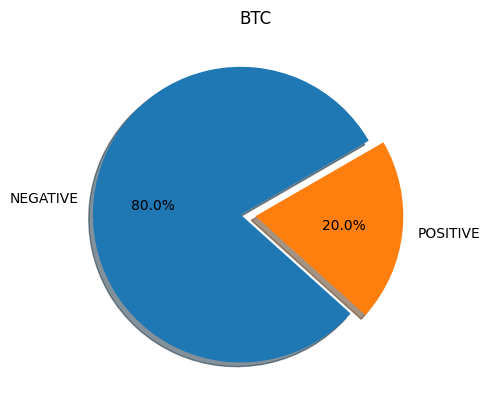

In [132]:
plt.pie(my_data.values, labels = my_data.index,autopct = '%1.1f%%', startangle=30, shadow =True, explode= [0.1, 0.0])
plt.title('BTC')
plt.show()

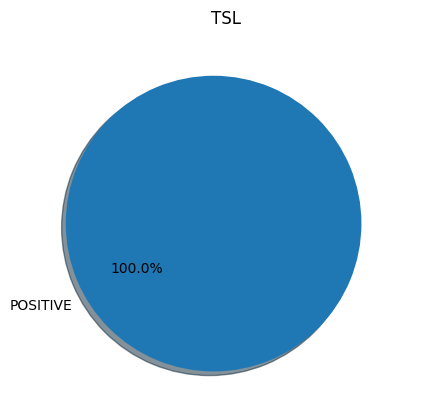

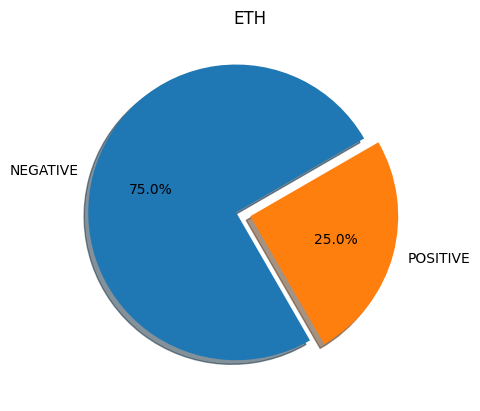

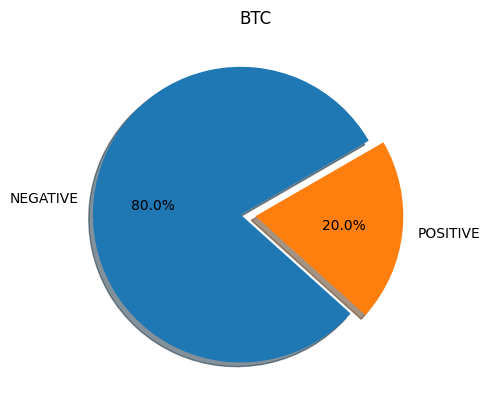

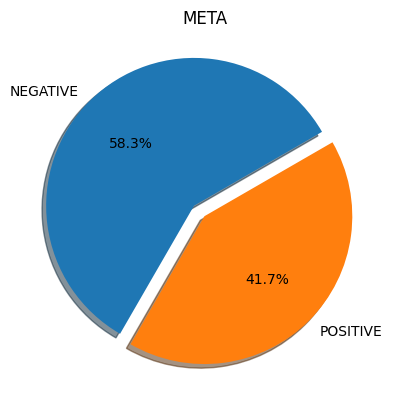

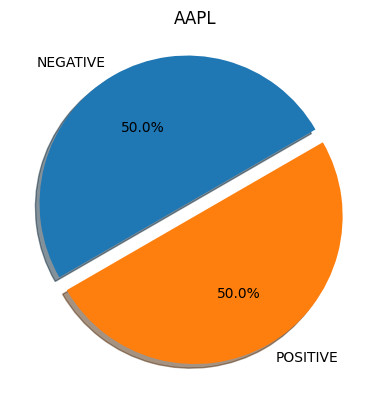

In [136]:
for ticker in monitored:
    my_data = data[data.Stock == ticker]['Label'].value_counts()
    if len(my_data) == 1:
        plt.pie(my_data.values, labels = my_data.index,autopct = '%1.1f%%', startangle=30, shadow =True, explode= [0.1,])
        plt.title(ticker)
        plt.show()
    else:  
        plt.pie(my_data.values, labels = my_data.index,autopct = '%1.1f%%', startangle=30, shadow =True, explode= [0.1, 0.0])
        plt.title(ticker)
        plt.show()